In [1]:
import pandas as pd

In [4]:
ts = pd.read_csv('market-price')
ts.columns = ['date','price']

In [5]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
date     61 non-null object
price    61 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [6]:
ts['date'] = pd.to_datetime(ts['date'])

In [8]:
ts.set_index('date', inplace=True)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

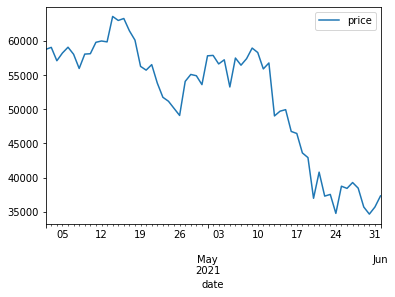

In [11]:
ts.plot()

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

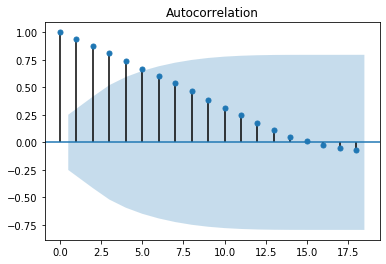

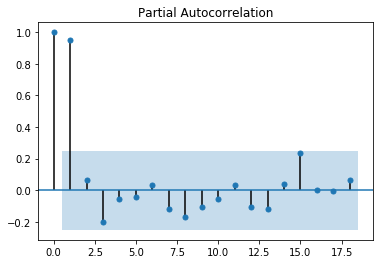

In [15]:
plot_acf(ts)
plot_pacf(ts)
plt.show()

# ACF 는 15 time lag change from + to -
# PACF is 0.9 at time lag 1
# p=0, q=1

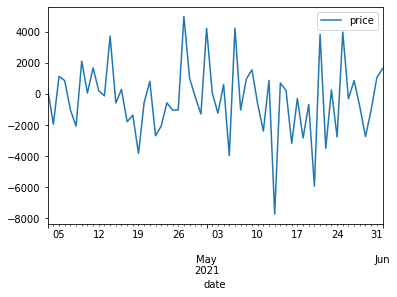

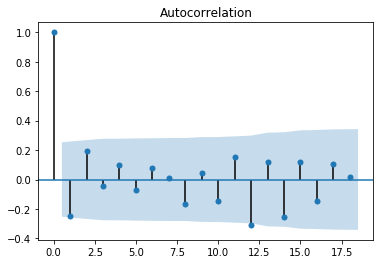

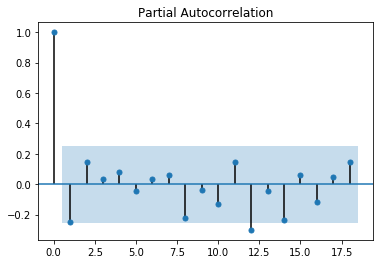

In [19]:
diff_ts = ts.diff(periods=1).iloc[1:]
diff_ts.plot()
plot_acf(diff_ts)
plot_pacf(diff_ts)
plt.show()

# 정상성을 나나태는 것으로 생각

In [24]:
# ARIMA(0,1,1) 모형의 파라메터 추정 및 예측

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts, order=(0,1,1))
model_fit = model.fit(trend='nc', full_output=True, disp=1)
print(model_fit.summary())

# 모형이 유의하지 않음...p value > 0.5

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   60
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -550.532
Method:                       css-mle   S.D. of innovations           2336.470
Date:                Tue, 01 Jun 2021   AIC                           1105.064
Time:                        12:43:57   BIC                           1109.253
Sample:                    04-03-2021   HQIC                          1106.702
                         - 06-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ma.L1.D.price    -0.1533      0.106     -1.453      0.151      -0.360       0.053
                                    Roots                                    
                  Real          Imaginary   

C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


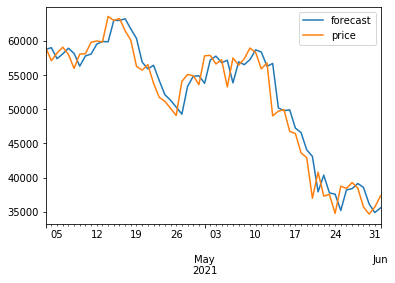

In [26]:
model_fit.plot_predict();

In [31]:
import numpy as np

In [54]:
fore = model_fit.forecast(steps=1)
print('predicted_value : {0}, standard error : {1}, lower_upper bound {2}'.format(fore[0],fore[1],fore[2]))

predicted_value : [37042.17360194], standard error : [2336.46972378], lower_upper bound [[32462.77709236 41621.57011153]]


In [55]:
# 정상성 검정

from statsmodels.tsa.stattools import adfuller

In [58]:
y = ts['price']
result = adfuller(y)

In [68]:
# p-value가 0.05보다 크면 정상시계열로 볼 수 없음
print('original time series ADF Statistics : {:.2f}'.format(result[0]))
print('original time series ADF p-value : {:.2f}'.format(result[1]))

original time series ADF Statistics : -0.15
original time series ADF p-value : 0.94


In [69]:
y2 = diff_ts['price']
result2= adfuller(y2)
print('1st differential time series ADF Statistics : {:.2f}'.format(result2[0]))
print('1st differential time series ADF p-value : {:.2f}'.format(result2[1]))

1st differential time series ADF Statistics : -9.68
1st differential time series ADF p-value : 0.00


In [73]:
def auto_arima(data, order, sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_list = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)), columns=['order', 'AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [74]:
auto_arima(ts,[2,2,2])

C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\K

,order,AIC
6,p1 d1 q0,1103.987002
3,p0 d1 q1,1104.926677
7,p1 d1 q1,1105.026824
2,p0 d1 q0,1105.708027
4,p1 d0 q0,1129.456079
5,p1 d0 q1,1129.792373
1,p0 d0 q1,1229.320662
0,p0 d0 q0,1282.549929


C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   60
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -548.994
Method:                       css-mle   S.D. of innovations           2276.600
Date:                Tue, 01 Jun 2021   AIC                           1103.987
Time:                        16:32:37   BIC                           1110.270
Sample:                    04-03-2021   HQIC                          1106.445
                         - 06-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -365.6884    236.918     -1.544      0.128    -830.039      98.663
ar.L1.D.price    -0.2448      0.125     -1.962      0.055      -0.489      -0.000
                                    Root

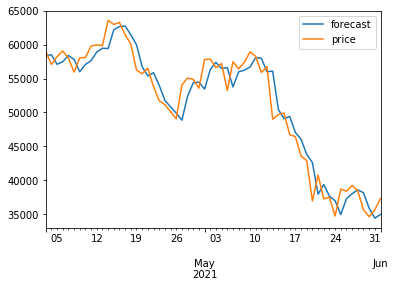

In [75]:
model = ARIMA(ts, (1,1,0))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_predict()
plt.show()

In [78]:
import datetime

In [80]:
ts.tail()

,price
date,
2021-05-28,38445.29
2021-05-29,35689.62
2021-05-30,34647.67
2021-05-31,35684.59
2021-06-01,37310.54


C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\KONIDE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


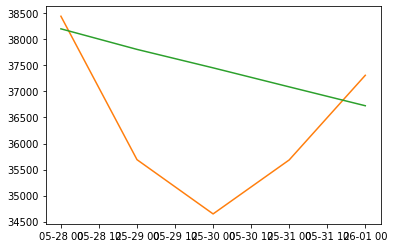

In [86]:
train, test = ts.loc[:datetime.datetime(2021,5,28), :],ts.loc[datetime.datetime(2021,5,28):, :]
model = ARIMA(train,(1,1,0))
model_fit = model.fit()
full_forecast = model_fit.forecast(steps=test.shape[0])
forecast = pd.DataFrame(full_forecast[0], index=test.index, columns=test.columns)
plt.plot(train.loc[datetime.datetime(2021,5,28):, :])
plt.plot(test)
plt.plot(forecast);